In [8]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
# Read data jamur untuk klasifikasi

df = pd.read_csv("mushrooms.csv")
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:

column = df[['cap-shape', 'cap-surface',
       'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring',
       'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population',
       'habitat']]
xtr, xts, ytr, yts = train_test_split(column, df['class'], test_size=.2)
print(len(xtr), len(xts), len(ytr), len(yts))

6499 1625 6499 1625


## Hyperparameter Tuning

In [12]:
penalty = ['l2']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {
    'penalty': penalty, 'solver': solver, 'max_iter': max_iter
}
param

{'penalty': ['l2'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

## Model

In [13]:
model = LogisticRegression()

In [14]:

from sklearn.model_selection import GridSearchCV
modelnew = GridSearchCV(
    estimator = model, 
    param_grid = param,
    cv = 5)

In [15]:
modelnew.fit(xtr, ytr)

/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: ne

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [16]:
modell = LogisticRegression(max_iter= 100, penalty= 'l2', solver= 'lbfgs')

In [17]:

modell.fit(xtr, ytr)

/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:

from sklearn.metrics import accuracy_score
Predict = modell.predict(xts)

In [19]:
print("Akurasi =", accuracy_score(y_true = yts, y_pred=Predict) * 100, "%")

Akurasi = 95.63076923076923 %


## Eva Metrics

In [20]:

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

print('Precision: ' ,precision_score(yts, modell.predict(xts)))
print('ROCAUC: ' ,roc_auc_score(yts, modell.predict(xts)))
print('Balanced Accuracy: ' ,balanced_accuracy_score(yts, modell.predict(xts)))
print('Recall: ' ,recall_score(yts, modell.predict(xts)))
print('F1 score: ' ,f1_score(yts, modell.predict(xts)))

Precision:  0.9663648124191462
ROCAUC:  0.9559846665939103
Balanced Accuracy:  0.9559846665939102
Recall:  0.9431818181818182
F1 score:  0.9546325878594248


## ROC AUC


In [64]:
dfra = pd.DataFrame()
dfra['class'] = df['class'].copy()

In [66]:
dfra['proba'] = modell.predict_proba(column)[:,1]
dfra.head()

,class,proba
0,1,8.391555e-01
1,0,2.012149e-01
2,0,5.747070e-02
3,1,8.562241e-01
4,0,2.834835e-08


In [68]:

dfra['y pred 0.1'] = dfra['proba'].apply(lambda x: 1 if (x > 0.1) else 0)
dfra['y pred 0.2'] = dfra['proba'].apply(lambda x: 1 if (x > 0.2) else 0)
dfra['y pred 0.3'] = dfra['proba'].apply(lambda x: 1 if (x > 0.3) else 0)
dfra['y pred 0.4'] = dfra['proba'].apply(lambda x: 1 if (x > 0.4) else 0)
dfra['y pred 0.5'] = dfra['proba'].apply(lambda x: 1 if (x > 0.5) else 0)
dfra['y pred 0.6'] = dfra['proba'].apply(lambda x: 1 if (x > 0.6) else 0)
dfra['y pred 0.7'] = dfra['proba'].apply(lambda x: 1 if (x > 0.7) else 0)
dfra['y pred 0.8'] = dfra['proba'].apply(lambda x: 1 if (x > 0.8) else 0)
dfra['y pred 0.9'] = dfra['proba'].apply(lambda x: 1 if (x > 0.9) else 0)
dfra

,class,proba,y pred 0.1,y pred 0.2,y pred 0.3,y pred 0.4,y pred 0.5,y pred 0.6,y pred 0.7,y pred 0.8,y pred 0.9
0,1,8.391555e-01,1,1,1,1,1,1,1,1,0
1,0,2.012149e-01,1,1,0,0,0,0,0,0,0
2,0,5.747070e-02,0,0,0,0,0,0,0,0,0
3,1,8.562241e-01,1,1,1,1,1,1,1,1,0
4,0,2.834835e-08,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,5.008414e-02,0,0,0,0,0,0,0,0,0
8120,0,6.336763e-05,0,0,0,0,0,0,0,0,0
8121,0,9.327946e-02,0,0,0,0,0,0,0,0,0
8122,1,9.339364e-01,1,1,1,1,1,1,1,1,1


## ROC AUC MODEL

In [74]:

from sklearn.metrics import confusion_matrix
Listroc = []
for i in range(1, 10):
    tn, fp, fn, tp = confusion_matrix(dfra['class'], dfra[f'y pred {i/10}']).reshape(-1,)
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    Listroc.append([fpr, tpr])
    
Listroc = np.array(Listroc)
Listroc

array([[0.23146388, 0.99463739],
       [0.10384981, 0.9828907 ],
       [0.06012357, 0.97369765],
       [0.04562738, 0.9624617 ],
       [0.0418251 , 0.9453524 ],
       [0.03897338, 0.92390194],
       [0.02923004, 0.89325843],
       [0.01853612, 0.85674157],
       [0.01711027, 0.79060266]])

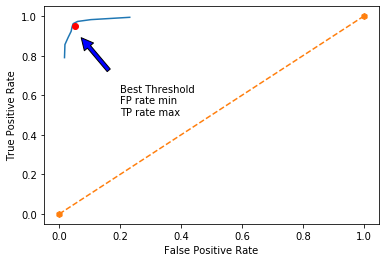

In [92]:
plt.plot(Listroc[:,0], Listroc[:,1]) # curva roc-nya
plt.plot(0.05,0.95,'ro')
plt.plot([0,1], [0,1], 'h--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Best Threshold\nFP rate min\nTP rate max', xy=(0.04,0.95), xytext=(.2, .5),
            arrowprops=dict(facecolor='blue', shrink=.2))
plt.show()

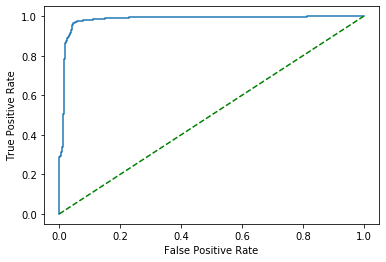

Luas AUC adalah  0.951763652675773


In [94]:
fpr, tpr, thres = roc_curve(dfra['class'], modell.predict_proba(column)[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'g--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('Luas AUC adalah ', roc_auc_score(dfra['class'], modell.predict(column)))